In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc
import pandas as pd
import math
import scipy 

In [5]:
vx = np.array([-1.71316,-0.261722,1.27846,-1.65123,-1.54082,0.381423])
vy = np.array([-0.645853,1.3268,3.15895,-1.44445,-1.45325,1.50386])
vz = np.array([0.,0.,0.,0.,0.,0.])
en = 0.5*(vx*vx+vy*vy+vz*vz)
print(en)

[1.67602164 0.91444832 5.80671254 2.40649816 2.24303092 1.2035392 ]


In [11]:
# Define Physics Constants
k = scc.k
e = scc.e
me = scc.m_e
pi = scc.pi
eVJ = scc.eV
eps = scc.epsilon_0
print(k,e,me,pi,eVJ,eps)

T_e0 = 3000. 
n_e0 = 1e15
Pressure = 10. 
Temperature = 300. 
e_EXC_TH = 11.5
e_ION_TH = 15.8

Ndens = Pressure/k/Temperature
omega_pe0 = pow(n_e0*e*e/eps/me, 0.5)
kTe0 = k*T_e0/eVJ
v_te0 = (k*T_e0/me)**0.5
sigma0 = n_e0*v_te0/omega_pe0
print(Ndens,omega_pe0,v_te0,kTe0,sigma0)
Ndens_ = Ndens/n_e0
Te_ = 1
me_ = 1
dt_ = 10
integer_collision_freq = 0.002744762867676734

1.380649e-23 1.602176634e-19 9.1093837015e-31 3.141592653589793 1.602176634e-19 8.8541878128e-12
2.41432350534664e+21 1783986365.9790838 213234.6466755825 0.25851999786435537 119527060711.89928


In [9]:
def boltez_distr(c):
    beta = (me/2/k/T_e0)**0.5
    # print("Cm =", 1/beta)
    c2 = c*c
    # fc = 4/sqrt_pi*beta**3*c2*np.exp(-beta*beta*c2)
    fc_ = (2/pi)**0.5*c2*np.exp(-0.5*c2)
    return fc_
def find_cmax(em):
    em_ = em/kTe0
    cm_ = (em_*2)**0.5
    return cm_
def ndv_to_e(v_,printmode=False):
    # from v_ to e 
    e_ = 0.5*1*v_*v_
    e0 = e_*kTe0
    if printmode:
        print("E_max=",np.max(e0))
    return e0
def fabs(x):
    return np.fabs(x)
def sqrt(x):
    return x**0.5

In [5]:
f_qELA = lambda en: 1e-20*(fabs(6.0 / pow(1.0 + (en/0.1) + pow(en/0.6,2.0), 3.3)- 1.1 * pow(en, 1.4) / (1.0 + pow(en/15.0, 1.2)) / sqrt(1.0 + pow(en/5.5, 2.5) + pow(en/60.0, 4.1))) + 0.05 / pow(1.0 + en/10.0, 2.0) + 0.01 * pow(en, 3.0) / (1.0 + pow(en/12.0, 6.0)))

qEXC = lambda en: 1e-20*(0.034 * pow(en-11.5, 1.1) * (1.0 + pow(en/15.0, 2.8)) / (1.0 + pow(en/23.0, 5.5)) + 0.023 * (en-11.5) / pow(1.0 + en/80.0, 1.9)) if en>e_EXC_TH else 0.

qION = lambda en: 1e-20*(970.0 * (en-15.8) / pow(70.0 + en, 2.0) + 0.06 * pow(en-15.8, 2.0) * np.exp(-en/9)) if en > e_ION_TH else 0.

f_qEXC = np.vectorize(qEXC)
f_qION = np.vectorize(qION)
en = np.array([0,11.5,16])
print(qEXC(16))
f_qEXC(en)

4.17325948678011e-21


array([0.00000000e+00, 0.00000000e+00, 4.17325949e-21])

In [78]:
def effective_collisions(nu_,Pcmax):
    count_collisions = 0
    for nu in nu_:
        P_sel = 1 - np.exp(-nu*dt_)
        R = np.random.rand()
        if R < P_sel/Pcmax:
            count_collisions += 1
    return count_collisions

def random_sample(c_,fmax):
# acceptance and reject
    while True:
        R1 = np.random.rand()
        c = 0 + R1*(c_[-1]-c_[0])
        fc = boltez_distr(c)
        R2 = np.random.rand()
        if R2 < fc/fmax:
            break
    return c

def find_sigma_tot(e):
    sigma_ela = f_qELA(e)
    sigma_exc = f_qEXC(e)
    sigma_ion = f_qION(e)
    sigma_tot = np.zeros(sigma_ela.shape)
    sigma = [sigma_ela, sigma_exc, sigma_ion]
    for si in sigma:
        sigma_tot += si
    sigma_tot *= sigma0
    return sigma_tot

In [74]:
N = 10000
e_max = 50
cm_ = find_cmax(e_max)
c_ = np.arange(0,cm_+0.01,0.01)
fmax = np.max(boltez_distr(c_))
collision_sample = []

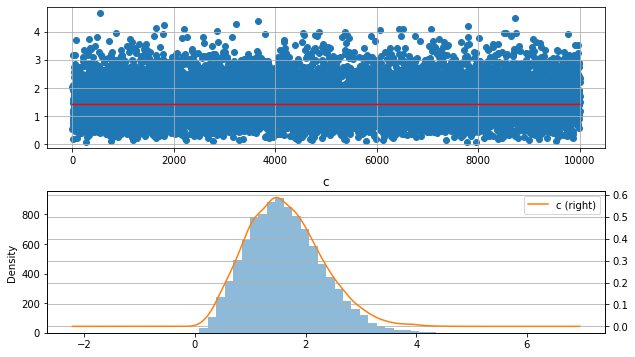

In [29]:
sample = []
for i in range(N):
    sample.append(random_sample(c_,fmax))
initial_size = len(sample)
pvel_ = np.array(sample)

df = pd.DataFrame(pvel_,columns=['c'])
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1) 
ax1.scatter(df.index, df.values)
plt.plot(range(N),np.ones(N)*sqrt(2),'r')
plt.grid()
ax2 = fig.add_subplot(2,1,2) 
df.hist(bins=30,alpha = 0.5,ax = ax2)
df.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

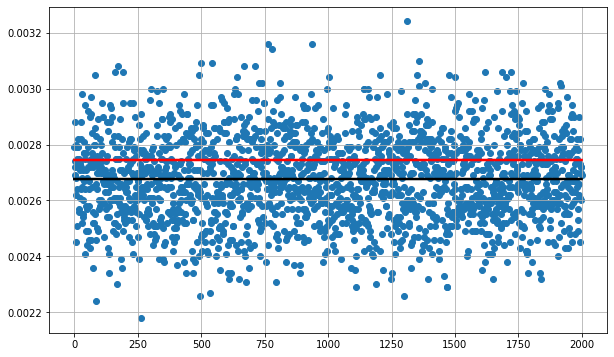

In [80]:
sample = []
for i in range(N):
    sample.append(random_sample(c_,fmax))
initial_size = len(sample)
pvel_ = np.array(sample)
statis_num = 2000
collision_storage = []
pe = ndv_to_e(pvel_)
psigma_ = find_sigma_tot(pe)
nu_ = psigma_*pvel_*Ndens_
nu_max = np.max(nu_)
Pcmax = 1 - np.exp(-nu_max*dt_)
N_select = int(((Pcmax*N+0.5)*10)/10)
index_list = np.arange(initial_size)
sel_pvel_ = np.random.choice(pvel_, N_select, replace=False)
sel_pen = ndv_to_e(sel_pvel_)
sel_psigma_ = find_sigma_tot(sel_pen)
sel_nu_ = sel_pvel_*sel_psigma_*Ndens_

for i in range(statis_num):
    count_collisions = effective_collisions(sel_nu_,Pcmax)
    collision_storage.append(count_collisions)
collision_storage = np.array(collision_storage)
particle_collisions_freq = collision_storage/dt_/N
average_collision_frequency = np.mean(particle_collisions_freq)
collision_sample.append(average_collision_frequency)

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(range(statis_num), particle_collisions_freq)
ax.plot(np.arange(statis_num), np.ones(statis_num)*integer_collision_freq, color = 'r', linewidth=2.5)
ax.plot(np.arange(statis_num), np.ones(statis_num)*average_collision_frequency, color = 'k', linewidth=2.5)
plt.grid()
plt.show()

In [77]:
sel_nu_

array([0.0013083 , 0.00267322, 0.00219154, ..., 0.00190005, 0.00120686,
       0.00022667])

In [ ]:
for inp in select_pindex:
    sel_nu_ = nu_[inp]
    P_sel = 1 - np.exp(-sel_nu_*dt_)
    R = np.random.rand()
    if R < P_sel/Pcmax:
        count_collisions += 1